In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import dataframe_coeficientes
from src.modelos import organiza_resultados, treinar_e_validar_modelo_regressao

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import seaborn as sns

RANDOM_STATE = 42

In [30]:
df = pd.read_parquet("../dados/diabetes_tratado.parquet")

df

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int32  
 1   sexo              442 non-null    int32  
 2   imc               442 non-null    float64
 3   pressao_media     442 non-null    float64
 4   colesterol_total  442 non-null    int32  
 5   ldl               442 non-null    float64
 6   hdl               442 non-null    float64
 7   colesterol_hdl    442 non-null    float64
 8   triglicerides     442 non-null    float64
 9   glicose           442 non-null    int32  
 10  target            442 non-null    int32  
dtypes: float64(6), int32(5)
memory usage: 29.5 KB


In [32]:
X = df.drop(columns='target')
y = df['target']

In [33]:
regressors = {
    "DummyRegressor": DummyRegressor(strategy="mean"),
    "LinearRegression": LinearRegression()
}

resultados = {
    nome_modelo: treinar_e_validar_modelo_regressao(X, y, regressor)
    for nome_modelo, regressor in regressors.items()
}

In [34]:
resultados

{'DummyRegressor': {'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00199819]),
  'score_time': array([0.01165843, 0.        , 0.        , 0.01550984, 0.01668024]),
  'test_r2': array([-0.01196298, -0.02697753, -0.01530397, -0.00021233, -0.04231598]),
  'test_neg_mean_absolute_error': array([-64.00646147, -70.57793551, -59.82954545, -70.05392912,
         -65.42565485]),
  'test_neg_root_mean_squared_error': array([-73.22249284, -80.04318688, -74.33859714, -82.04745226,
         -76.3152967 ])},
 'LinearRegression': {'fit_time': array([0.00552058, 0.00299096, 0.00306559, 0.        , 0.        ]),
  'score_time': array([0.00918627, 0.00299311, 0.00419021, 0.        , 0.        ]),
  'test_r2': array([0.45260276, 0.57320015, 0.39144785, 0.58428888, 0.39081186]),
  'test_neg_mean_absolute_error': array([-42.79409468, -41.58260275, -47.22331116, -42.12235506,
         -47.62636803]),
  'test_neg_root_mean_squared_error': array([-53.85344584, -51.60075202, -57.55263581,

In [35]:
df_resultados = organiza_resultados(resultados)
df_resultados

,model,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,time_seconds
0,DummyRegressor,0.0,0.011658,-0.011963,-64.006461,-73.222493,0.011658
1,DummyRegressor,0.0,0.0,-0.026978,-70.577936,-80.043187,0.0
2,DummyRegressor,0.0,0.0,-0.015304,-59.829545,-74.338597,0.0
3,DummyRegressor,0.0,0.01551,-0.000212,-70.053929,-82.047452,0.01551
4,DummyRegressor,0.001998,0.01668,-0.042316,-65.425655,-76.315297,0.018678
5,LinearRegression,0.005521,0.009186,0.452603,-42.794095,-53.853446,0.014707
6,LinearRegression,0.002991,0.002993,0.5732,-41.582603,-51.600752,0.005984
7,LinearRegression,0.003066,0.00419,0.391448,-47.223311,-57.552636,0.007256
8,LinearRegression,0.0,0.0,0.584289,-42.122355,-52.895024,0.0
9,LinearRegression,0.0,0.0,0.390812,-47.626368,-58.342847,0.0


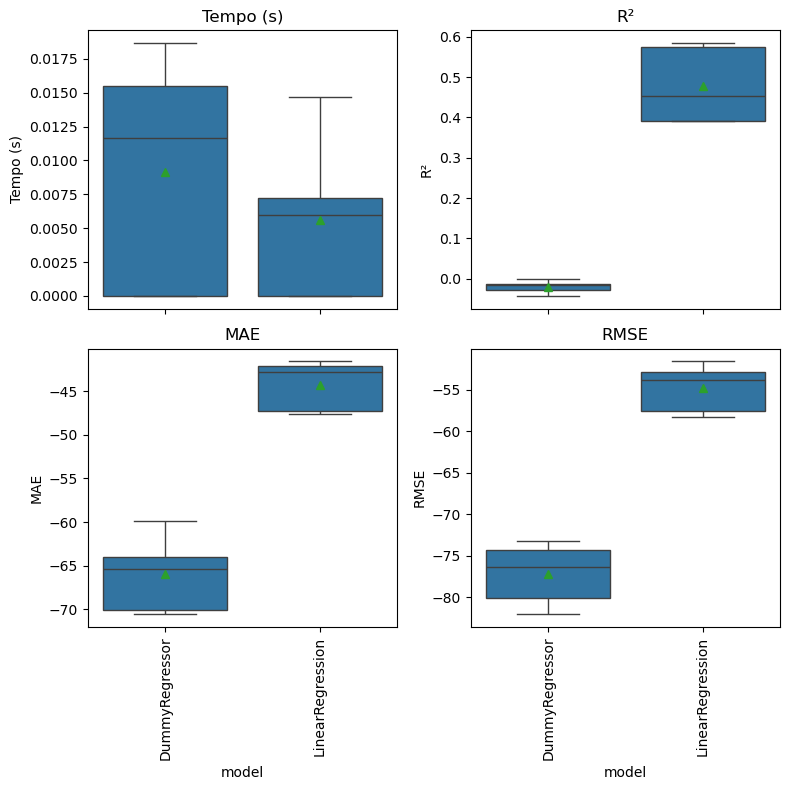

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True)

comparar_metricas = [
    "time_seconds",
    "test_r2",
    "test_neg_mean_absolute_error",
    "test_neg_root_mean_squared_error",
]

nomes_metricas = [
    "Tempo (s)",
    "R²",
    "MAE",
    "RMSE",
]

for ax, metrica, nome in zip(axs.flatten(), comparar_metricas, nomes_metricas):
    sns.boxplot(
        x="model",
        y=metrica,
        data=df_resultados,
        ax=ax,
        showmeans=True,
    )
    ax.set_title(nome)
    ax.set_ylabel(nome)
    ax.tick_params(axis="x", rotation=90)

plt.tight_layout()

plt.show()


Basicamente aqui a gente tem um comparador das metricas do modelo, a gente veio aprendendo como ajustar as colunas para ter o melhor resultado e ter a validação cruzada com intuito de dividir melhor a base para encontrar a maior metrica em cada uma dos pontuadores e agora dividimos isso tudo em gráficos